# Results

## Linear Regression 
CV Score: 0.165 
Test Score: 0.16454088984181903

## Polynomial Regression
CV Score: 0.165 
Test Score: 0.1645408413852154

## SGD Regression
CV Score: 0.1634937630453061
Test Score: 0.16291008822896602

## Ridge Regression
CV Score: 0.16336144479033818
Test Score: 0.16454088913302967

## Lasso Regression
CV Score: 0.16305691570212932
Test Score: 0.16446225897094277

## Dtree Regression
CV Score:
Test Score:

## SVR 
CV Score:
Test Score:

In [1]:
import numpy as np
import pandas as pd

In [2]:
pip install xlrd

In [3]:
data = pd.read_excel("Patent Data Variables.xlsx")


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 25 columns):
pat        65535 non-null int64
fwd        65535 non-null int64
lag_d      65535 non-null int64
lag_y      65535 non-null int64
noc        65535 non-null int64
gy         65535 non-null int64
ay         65535 non-null int64
noi        65535 non-null int64
UMC        65535 non-null int64
firm       65535 non-null int64
MSA        65535 non-null int64
tbm        65535 non-null int64
tbru       65535 non-null float64
PAG        65535 non-null float64
npr        65535 non-null int64
fpr        65535 non-null int64
FT         65535 non-null int64
Cent       65535 non-null float64
EXP_Y      65535 non-null float64
DT         65535 non-null float64
IT         65535 non-null float64
RT         65535 non-null float64
3rd_PT     65535 non-null float64
Rnd_Int    65535 non-null float64
FS         38808 non-null float64
dtypes: float64(10), int64(15)
memory usage: 12.5 MB


In [5]:
data.drop(columns=['lag_y'],inplace=True)

In [6]:
#data['log_fwd'] = data['fwd'].apply(lambda x: np.log(x+0.001))
#cap_right = ['lag_d','noc','tbm','tbru']
#data['lag_d'] = data['lag_d'].apply(lambda x: np.log(x+0.001))
#data['noc'] = data['noc'].apply(lambda x: np.log(x+0.001))
#data['tbm'] = data['tbm'].apply(lambda x: np.log(x+0.001))
#data['tbru'] = data['tbru'].apply(lambda x: np.log(x+0.001))

In [7]:
from sklearn.model_selection import train_test_split
'''
X_train, X_test, y_train, y_test = train_test_split(data.drop(['log_fwd','fwd','ay','gy'], axis=1),
                                                    data['log_fwd'],
                                                    test_size=0.2,
                                                    random_state=0)
'''

X_train, X_test, y_train, y_test = train_test_split(data.drop(['fwd'], axis=1),
                                                    data['fwd'],
                                                    test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((52428, 23), (13107, 23))

In [8]:
#categorical=['ay','gy','firm','UMC','MSA','FT']
categorical=['firm','UMC','MSA','FT']

In [9]:
#npr 20/25
#Cent 20
#IT 25
'''
import matplotlib.pyplot as plt

var = 'npr'

disc = EqualFrequencyDiscretiser(q=25, variables =var)
disc.fit(X_train)
train_t = disc.transform(X_train)
pd.concat([train_t, y_train], axis=1).groupby(var)['fwd'].mean().plot()
print(disc.binner_dict_)
plt.ylabel('mean of fwd')
'''


"\nimport matplotlib.pyplot as plt\n\nvar = 'npr'\n\ndisc = EqualFrequencyDiscretiser(q=25, variables =var)\ndisc.fit(X_train)\ntrain_t = disc.transform(X_train)\npd.concat([train_t, y_train], axis=1).groupby(var)['fwd'].mean().plot()\nprint(disc.binner_dict_)\nplt.ylabel('mean of fwd')\n"

In [10]:
#fpr
'''
import matplotlib.pyplot as plt 
var ='fpr'

disc = EqualWidthDiscretiser(bins=15, variables =var)
disc.fit(X_train)
train_t = disc.transform(X_train)
pd.concat([train_t, y_train], axis=1).groupby(var)['fwd'].mean().plot()
plt.ylabel('mean of fwd')
'''


"\nimport matplotlib.pyplot as plt \nvar ='fpr'\n\ndisc = EqualWidthDiscretiser(bins=15, variables =var)\ndisc.fit(X_train)\ntrain_t = disc.transform(X_train)\npd.concat([train_t, y_train], axis=1).groupby(var)['fwd'].mean().plot()\nplt.ylabel('mean of fwd')\n"

In [11]:
import seaborn as sns
import scipy.stats as stats
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

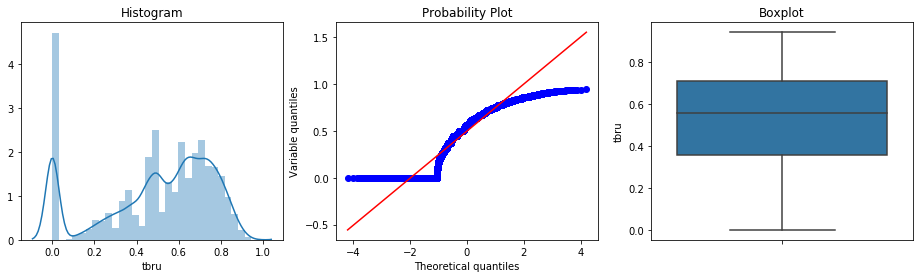

In [12]:
from feature_engine.outlier_removers import Winsorizer
cap_right = ['lag_d','noc','tbm']
#'npr','fpr','Cent','RT','3rd_PT']
cap_left = ['tbru']
#ouliers = ['npr','fpr','Cent','IT','RT','DT']

#gaussian,skewed,quantiles
#lag_d - gaussian right

winsorizer = Winsorizer(distribution='gaussian', # choose skewed for IQR rule boundaries or gaussian for mean and std
                          tail='left', # cap left, right or both tails 
                          fold=3,
                          variables=cap_left)

winsorizer.fit(X_train)
winsorizer.left_tail_caps_
winsorizer.right_tail_caps_
X_train_t = winsorizer.transform(X_train)
X_test_t = winsorizer.transform(X_test)
for variable in cap_left:
    diagnostic_plots(X_train_t, variable)

In [13]:
data[cap_right].describe()

,lag_d,noc,tbm
count,65535.000000,65535.000000,65535.000000
mean,923.934127,18.856489,11.376257
std,364.032954,15.708926,15.674491
min,0.000000,1.000000,0.000000
25%,691.500000,9.000000,5.000000
50%,888.000000,16.000000,8.000000
75%,1100.000000,24.000000,13.000000
max,5285.000000,375.000000,745.000000


In [14]:
X_train[categorical] = X_train[categorical].astype('O')
X_test[categorical] = X_test[categorical].astype('O')
discrete = ['npr','fpr','Cent','IT']
drop_var = ['lag_y', 'fwd', 'log_fwd']
continuous=list(set(list(data.columns))-set(categorical) - set(discrete) -set(drop_var))
#X_train[dicrete] = X_train[dicrete].astype('O')
#X_test[dicrete] = X_test[dicrete].astype('O')

In [15]:
# import relevant modules for feature engineering
from sklearn.pipeline import Pipeline
from feature_engine import missing_data_imputers as mdi
from feature_engine import categorical_encoders as ce
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from feature_engine.outlier_removers import Winsorizer
from sklearn.preprocessing import FunctionTransformer
from feature_engine.variable_transformers import LogTransformer
from feature_engine.missing_data_imputers import AddNaNBinaryImputer
from feature_engine.missing_data_imputers import EndTailImputer
from sklearn.impute import SimpleImputer
from feature_engine.discretisers import EqualFrequencyDiscretiser
from feature_engine.discretisers import EqualWidthDiscretiser


In [16]:
## First approach - add constant to cap_right before your original transformer

In [17]:
for var in cap_right:
    X_train[var] = X_train[var]+0.01
    X_test[var] = X_test[var]+0.01  
    

In [18]:
#log_transfomrer= log_add_const(cap_right)

In [19]:
patent_preprocess = Pipeline([
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='median',variables=['FS'])),
    ('equal_freq_disc1',EqualFrequencyDiscretiser(q=20, variables =['npr','Cent'])),
    ('equal_freq_disc2',EqualFrequencyDiscretiser(q=25, variables =['IT'])),
    ('equal_dist_disc',EqualWidthDiscretiser(bins=15, variables =['fpr'])),
    ('capping_right',Winsorizer(distribution='gaussian',tail='right',fold=3,variables=cap_right)),
    ('capping_left',Winsorizer(distribution='gaussian',tail='left',fold=3,variables=cap_left)),
     ('log_transform',LogTransformer(variables = cap_right)),
    # categorical encoding 
     ('rare_label_enc', ce.RareLabelCategoricalEncoder(tol=0.01,n_categories=6, variables=categorical )),
    #('categorical_enc', ce.OrdinalCategoricalEncoder(encoding_method='ordered', variables=categorical)),
    ('One_hot', ce.OneHotCategoricalEncoder(variables = categorical)),
     
])

In [20]:
patent_preprocess.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('imputer_num',
                 MeanMedianImputer(imputation_method='median',
                                   variables=['FS'])),
                ('equal_freq_disc1',
                 EqualFrequencyDiscretiser(q=20, return_object=False,
                                           variables=['npr', 'Cent'])),
                ('equal_freq_disc2',
                 EqualFrequencyDiscretiser(q=25, return_object=False,
                                           variables=['IT'])),
                ('equal_dist_disc',
                 EqualWidthDiscretiser(bins=15, return...
                 Winsorizer(distribution='gaussian', fold=3, tail='left',
                            variables=['tbru'])),
                ('log_transform',
                 LogTransformer(variables=['lag_d', 'noc', 'tbm'])),
                ('rare_label_enc',
                 RareLabelCategoricalEncoder(n_categories=6, tol=0.01,
                                             variabl

In [21]:
# Apply Transformations
X_train=patent_preprocess.transform(X_train)
X_test=patent_preprocess.transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures


In [23]:
lr= LinearRegression()

In [24]:
percentage_null_values= X_train.isnull().mean()
for key,value in percentage_null_values.items():
    if value >0:
        print(key,":",value)

In [25]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, y_train)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))


Cross-validation scores: [0.16422551 0.16899737 0.15998867 0.14266537 0.15467932]
Average cross-validation score: 0.16


In [27]:
lr.score(X_train,y_train)

0.16251328349877026

In [28]:
lr.score(X_test,y_test)

0.1610364990597778

In [52]:
'''
def add_const(X):
    X['noc'] = X['noc'].apply(lambda x: np.log(x+0.001))
    return X
'''

Taking Log first and then do polynomial Transformations

In [29]:
from sklearn.compose import ColumnTransformer
model_gs1 = Pipeline([ ('log_trans', ColumnTransformer(transformers=[
                     ('np_log1p', FunctionTransformer(np.log1p, validate=True), ['noc']),   
                     ], remainder='passthrough')),
    
    
                     ("Poly",PolynomialFeatures()),
                     


                     ("regressor", LinearRegression())])


In [30]:

model_parm_gd = [
    
    #{'regressor': [LinearRegression()]},
    
    {   'Poly__degree':range(1,3),
        'regressor': [LinearRegression()]},
]

In [31]:
grid_search_house_pipe = GridSearchCV(model_gs1, model_parm_gd,cv=5)
grid_search_house_pipe.fit(X_train,y_train)

X_train_preds = grid_search_house_pipe.predict(X_train)
X_test_preds = grid_search_house_pipe.predict(X_test)


from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

print("Best Mean Cross-validation score: {:.2f}".format(grid_search_house_pipe.best_score_))
print(grid_search_house_pipe.best_params_)



print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))


Best Mean Cross-validation score: 0.15
{'Poly__degree': 1, 'regressor': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)}
train mse: 919.9366495265203
train rmse: 30.330457456598314
train r2: 0.15933313502270974

test mse: 988.9558150749846
test rmse: 31.447667879748803
test r2: 0.15811842680687305


In [721]:
from sklearn.preprocessing import MinMaxScaler

reg_sgd_pipe = Pipeline([
    ('scaler',MinMaxScaler()),
    ('sgd_reg',SGDRegressor(max_iter=100,verbose=11,early_stopping=True,validation_fraction=0.2))
])

param_sgd = {'sgd_reg__learning_rate':['invscaling','adaptive'],
            'sgd_reg__penalty':['l2', 'l1', 'elasticnet'],
             'sgd_reg__alpha':[0.0001,0.0005,0.001],
             'sgd_reg__l1_ratio':[0.15,0.20,0.40,0.50,0.60],
             'sgd_reg__tol':[1e-4,1e-3]
            }
grid_sgd = GridSearchCV(reg_sgd_pipe,param_sgd,cv=5,n_jobs=-1,return_train_score=True)

grid_sgd.fit(X_train,y_train)

X_train_preds = grid_sgd.predict(X_train)
X_test_preds = grid_sgd.predict(X_test)



scores = cross_val_score(grid_sgd, X_train, y_train)
print("Cross-validation scores: {}".format(scores))

print("CV Score",grid_sgd.score(X_train, y_train))

print("Mean CV Score :",grid_sgd.best_score_)

print('train rmse',sqrt(mean_squared_error(y_train,X_train_preds)))
print("train r2: ", r2_score(y_train,X_train_preds))

print('test rmse',sqrt(mean_squared_error(y_test,X_test_preds)))
print("test r2: ", r2_score(y_test,X_test_preds))

print('best partams', grid_sgd.best_params_)

-- Epoch 1
Norm: 76.61, NNZs: 94, Bias: 20.499529, T: 41942, Avg. loss: 383.960198
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 96.42, NNZs: 88, Bias: 14.838074, T: 83884, Avg. loss: 380.249650
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 113.83, NNZs: 83, Bias: 14.944467, T: 125826, Avg. loss: 378.460660
Total training time: 0.12 seconds.
-- Epoch 4
Norm: 130.78, NNZs: 85, Bias: 12.203923, T: 167768, Avg. loss: 378.005803
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 148.87, NNZs: 84, Bias: 13.045256, T: 209710, Avg. loss: 377.623638
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 162.22, NNZs: 86, Bias: 8.130476, T: 251652, Avg. loss: 377.219246
Total training time: 0.24 seconds.
-- Epoch 7
Norm: 177.97, NNZs: 83, Bias: 11.633820, T: 293594, Avg. loss: 377.484671
Total training time: 0.29 seconds.
-- Epoch 8
Norm: 178.68, NNZs: 86, Bias: 10.173612, T: 335536, Avg. loss: 365.377039
Total training time: 0.33 seconds.
-- Epoch 9
Norm: 180.43, NNZs: 85, Bias: 9.80

In [722]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

ridge_pipe = Pipeline([
        ('scaler',StandardScaler()),
        ('ridge_reg',Ridge())])

ridge_params = {'ridge_reg__alpha':[0.001, 0.01,0.05, 0.1, 0.25,0.5,1, 10,100,150]}

grid_ridge = GridSearchCV(ridge_pipe,ridge_params,cv=5,return_train_score = True)

grid_ridge.fit(X_train,y_train)

X_train_preds = grid_ridge.predict(X_train)
X_test_preds = grid_ridge.predict(X_test)


print('best params ',grid_ridge.best_params_)
scores = cross_val_score(grid_ridge, X_train, y_train)
print("Cross-validation scores: {}".format(scores))
print('Cv score ',grid_ridge.best_score_)

print('train rmse',sqrt(mean_squared_error(y_train,X_train_preds)))
print("train r2: ", r2_score(y_train,X_train_preds))

print('test rmse',sqrt(mean_squared_error(y_test,X_test_preds)))
print("test r2: ", r2_score(y_test,X_test_preds))
print("Ridge Test Performance: ", grid_ridge.score(X_test,y_test))


best params  {'ridge_reg__alpha': 0.001}
Cross-validation scores: [0.17267337 0.17349531 0.16524642 0.14646206 0.15886419]
Cv score  0.16336144479033818
train rmse 30.18106743994525
train r2:  0.16759400300728466
test rmse 31.327485813824357
test r2:  0.16454088913302967
Ridge Test Performance:  0.16454088913302967


In [723]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso(selection='random',max_iter=10000)

param_lasso = {'alpha':[0.001, 0.01,0.05, 0.1, 0.25,0.5,1, 10,100,150]}

grid_lasso = GridSearchCV(lasso,param_lasso,cv=10, return_train_score = True)

grid_lasso.fit(X_train,y_train)

X_train_preds = grid_lasso.predict(X_train)
X_test_preds = grid_lasso.predict(X_test)

print('CV Score',grid_lasso.best_score_)
print('Train RMSE',sqrt(mean_squared_error(y_train,X_train_preds)))
print('Test RMSE',sqrt(mean_squared_error(y_test,X_test_preds)))
print('Test Score/R-Square',grid_lasso.score(X_test,y_test))

CV Score 0.16305691570212932
Train RMSE 30.18117056219686
Test RMSE 31.32895998969921
Test Score/R-Square 0.16446225897094277


In [724]:
#Took too long to run
'''
from sklearn.neighbors import KNeighborsRegressor

knn_pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('knn_reg',KNeighborsRegressor(algorithm='auto'))
])

knn_params = {'knn_reg__weights':['uniform','distance'],
             'knn_reg__leaf_size': [5,10,20,30],
             'knn_reg__n_neighbors': [5,10,15],
             'knn_reg__p':[1,2,3]}

knn_reg_grid = GridSearchCV(knn_pipe,knn_params,cv=5,return_train_score = True)

knn_reg_grid.fit(X_train,y_train)

X_train_preds = knn_reg_grid.predict(X_train)
X_test_preds = knn_reg_grid.predict(X_test)

print("CV score ",knn_reg_grid.best_score_)
print("Best Params ",knn_reg_grid.best_params_)

print("train RMSE",sqrt(mean_squared_error(y_train,X_train_preds)))
print("train R2/score",r2_score(y_train,X_train_preds))

print("test RMSE",sqrt(mean_squared_error(y_test,X_test_preds)))
print("test R2/score",r2_score(y_test,X_test_preds))
'''



'\nfrom sklearn.neighbors import KNeighborsRegressor\n\nknn_pipe = Pipeline([\n    (\'scaler\',StandardScaler()),\n    (\'knn_reg\',KNeighborsRegressor(algorithm=\'auto\'))\n])\n\nknn_params = {\'knn_reg__weights\':[\'uniform\',\'distance\'],\n             \'knn_reg__leaf_size\': [5,10,20,30],\n             \'knn_reg__n_neighbors\': [5,10,15],\n             \'knn_reg__p\':[1,2,3]}\n\nknn_reg_grid = GridSearchCV(knn_pipe,knn_params,cv=5,return_train_score = True)\n\nknn_reg_grid.fit(X_train,y_train)\n\nX_train_preds = knn_reg_grid.predict(X_train)\nX_test_preds = knn_reg_grid.predict(X_test)\n\nprint("CV score ",knn_reg_grid.best_score_)\nprint("Best Params ",knn_reg_grid.best_params_)\n\nprint("train RMSE",sqrt(mean_squared_error(y_train,X_train_preds)))\nprint("train R2/score",r2_score(y_train,X_train_preds))\n\nprint("test RMSE",sqrt(mean_squared_error(y_test,X_test_preds)))\nprint("test R2/score",r2_score(y_test,X_test_preds))\n'

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dreg_pipe = Pipeline([
    ('dtree_reg',DecisionTreeRegressor())
])

dreg_params = {
    'dtree_reg__criterion':['mse','friedman_mse','mae'],
    'dtree_reg__splitter':['random','best'],
    'dtree_reg__max_depth':[20,30],
    'dtree_reg__min_samples_split':[4,8,12,16],
    'dtree_reg__min_samples_leaf' :[2,4,8],
    'dtree_reg__max_features':['auto','sqrt']
}

dtree_reg_grid = GridSearchCV(dreg_pipe,dreg_params,cv=5,return_train_score = True)

dtree_reg_grid.fit(X_train,y_train)

X_train_preds = dtree_reg_grid.predict(X_train)
X_test_preds = dtree_reg_grid.predict(X_test)

print("CV score ",dtree_reg_grid.best_score_)
print("Best Params ",dtree_reg_grid.best_params_)

print("train RMSE",sqrt(mean_squared_error(y_train,X_train_preds)))
print("train R2/score",r2_score(y_train,X_train_preds))

print("test RMSE",sqrt(mean_squared_error(y_test,X_test_preds)))
print("test R2/score",r2_score(y_test,X_test_preds))

In [ ]:
from sklearn.svm import SVR

svm_reg_pipe = Pipeline([
    ('svm_reg',SVR())
])

svm_reg_params = {
    'svm_reg__kernel':['linear','poly','rbf','sigmoid'],
    'svm_reg__degree':[3,4,5],
    'svm_reg__gamma': ['auto','scale'],
    'svm_reg__coef0':[2.0,4.0,10.0,15.0]
}

svm_reg_grid = GridSearchCV(svm_reg_pipe,svm_reg_params,cv=5,return_train_score = True)

svm_reg_grid.fit(X_train,y_train)

X_train_preds = svm_reg_grid.predict(X_train)
X_test_preds = svm_reg_grid.predict(X_test)

print("CV score ",svm_reg_grid.best_score_)
print("Best Params ",svm_reg_grid.best_params_)

print("train RMSE",sqrt(mean_squared_error(y_train,X_train_preds)))
print("train R2/score",r2_score(y_train,X_train_preds))

print("test RMSE",sqrt(mean_squared_error(y_test,X_test_preds)))
print("test R2/score",r2_score(y_test,X_test_preds))


In [ ]:
#took too long to run

'''
model_parm_gd = [
    
    #{'regressor': [LinearRegression()]},
    
    {   'Poly__degree':range(1,2),
       'regressor': [LinearRegression()]},
    {   'Poly__degree':range(1,3),
        'regressor':[SGDRegressor(max_iter=1000,verbose=11,early_stopping=True,validation_fraction=0.2)],
        'regressor__learning_rate':['invscaling','adaptive'],
        'regressor__penalty':['l2', 'l1', 'elasticnet'],
        'regressor__alpha':[0.0001,0.0005,0.001],
        'regressor__l1_ratio':[0.15,0.20,0.40,0.50,0.60],
        'regressor__tol':[1e-4,1e-3]
    }
 
]

    { 'regressor': [Ridge()],
     'Poly__degree':range(1,3),
     'regressor__alpha':[10, 50,100],
    'regressor__solver':['auto']},
    
    { 'Poly__degree':range(1,3),
     'regressor': [Lasso()],
      'regressor__alpha':[1, 10,50]},


grid_search_house_pipe = GridSearchCV(model_gs, model_parm_gd,cv=5)
grid_search_house_pipe.fit(X_train,y_train)


# let's get the predictions
X_train_preds = grid_search_house_pipe.predict(X_train)
X_test_preds = grid_search_house_pipe.predict(X_test)


from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

print("Best Mean Cross-validation score: {:.2f}".format(grid_search_house_pipe.best_score_))
print(grid_search_house_pipe.best_params_)



print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))
'''